In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import os
os.chdir("données_2")

In [4]:
df = pd.read_csv("jeux_final.csv")


In [5]:
df['Full bathrooms'] = df['Full bathrooms'].astype('int')


In [6]:
df.head()

,Id,Sold Price,Type,Year built,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed On,Listed Price,City,Zip,latitude,longitude,Prix_m2
0,1,505000.0,SingleFamily,1926,3,2.0,2,872.0,1.0,1.0,3.000000,0.800000,2.00000,1.3,5.050000e+05,6253.00000,2019-10-16,525000.0,Los Angeles,90047,33.978652,-118.307728,6230
1,2,140000.0,SingleFamily,1958,2,3.0,1,1152.0,0.0,0.0,5.755392,1.102767,6.17454,10.1,4.962700e+04,468.00000,2019-08-25,180000.0,Strawberry,95375,38.193564,-120.014449,1301
2,3,1775000.0,SingleFamily,1947,5,3.0,3,2612.0,0.0,0.0,9.000000,0.200000,8.00000,0.2,1.775000e+06,20787.00000,2019-10-24,1895000.0,Culver City,90230,34.010206,-118.400952,7306
3,5,221000.0,SingleFamily,1905,3,2.0,2,1311.0,0.0,0.0,5.755392,1.102767,2.00000,3.3,2.080800e+05,2531.00000,2019-10-30,224900.0,Stockton,95202,37.956365,-121.279334,1807
4,7,480000.0,SingleFamily,2005,3,2.0,2,2519.0,4.0,4.0,4.000000,6.300000,2.00000,6.3,7.894083e+05,9970.80071,2019-10-18,499000.0,Taylorsville,95983,40.100181,-120.852452,2044


In [8]:
df.to_csv('\donne_final.csv')

## statistiques descriptives 

Le type de logement le plus fréquent en californie?

In [9]:
df['Type'].mode()[0]

'SingleFamily'

l'age moyen du parc immobilier?


In [10]:
int(sum(2022 - df['Year built']) /(df.shape[0]))

61

la surface moyenne d'un logement?

In [11]:
(df['Total interior livable area'].mean()) / 10.76

540.0110904891314

le prix moyen du m² de tout californie?

éliminer les outliers? pour cela il faut idéalement passer par le calcul du prix du m²
au lieu du prix global du logement. C'est une forme de normalisation

In [12]:
#boxplot = df.boxplot(column=['Prix_m2'],figsize=(10,60))  
#plt.show()
# l'écart interquatile IQR = Q3 -Q1
Q1 = df['Prix_m2'].quantile(0.25)
Q3 = df['Prix_m2'].quantile(0.75)

IQR = Q3 -Q1
val_min = Q1-IQR
val_max = Q3 +IQR

filtre = np.logical_and(df['Prix_m2']> val_min, df['Prix_m2'] <val_max)

df = df.loc[filtre,:]

In [48]:
os.getcwd()

'D:\\2022-2023\\Projet_analyse_statistique\\données_2'

In [13]:
#prix moyen du m²

df['Prix_m2'].mean()

7008.790027105337

le prix du m² carré par ville

In [14]:
df['Prix_m2'].groupby(df.City).apply(np.mean).sort_values(ascending=False)

City
Union City       14891.00000
North Hills      14719.00000
Atherton         12424.34375
Los Altos        12421.66113
Hermosa Beach    12201.00000
                    ...     
Canby              903.50000
Twain              871.00000
Baker              753.00000
Madeline           742.00000
Desert Center      516.00000
Name: Prix_m2, Length: 904, dtype: float64

histogramme du nombre de villes par prix du m²

<AxesSubplot: xlabel='Prix_m2', ylabel='Count'>

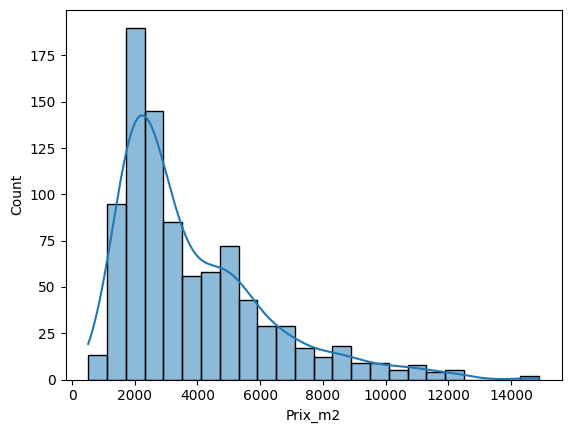

In [20]:
sns.histplot(x=(df['Prix_m2'].groupby(df.City).apply(np.mean)).sort_values(ascending=False), kde=True, legend=['density','numberof'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   PC1           150 non-null    float64
 6   PC2           150 non-null    float64
 7   PC3           150 non-null    float64
 8   PC4           150 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.7+ KB


<AxesSubplot: xlabel='Prix_m2'>

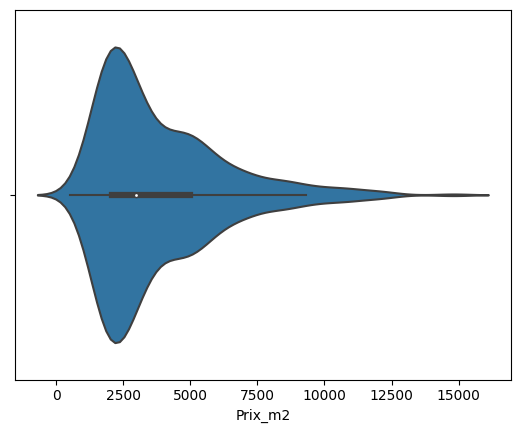

In [21]:
#violinplot

sns.violinplot(x=df['Prix_m2'].groupby(df.City).apply(np.mean))

matrice de correlation entre les valeurs 

C:\Users\savad\AppData\Local\Temp\ipykernel_3680\974685047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\savad\AppData\Local\Temp\ipykernel_3680\974685047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))


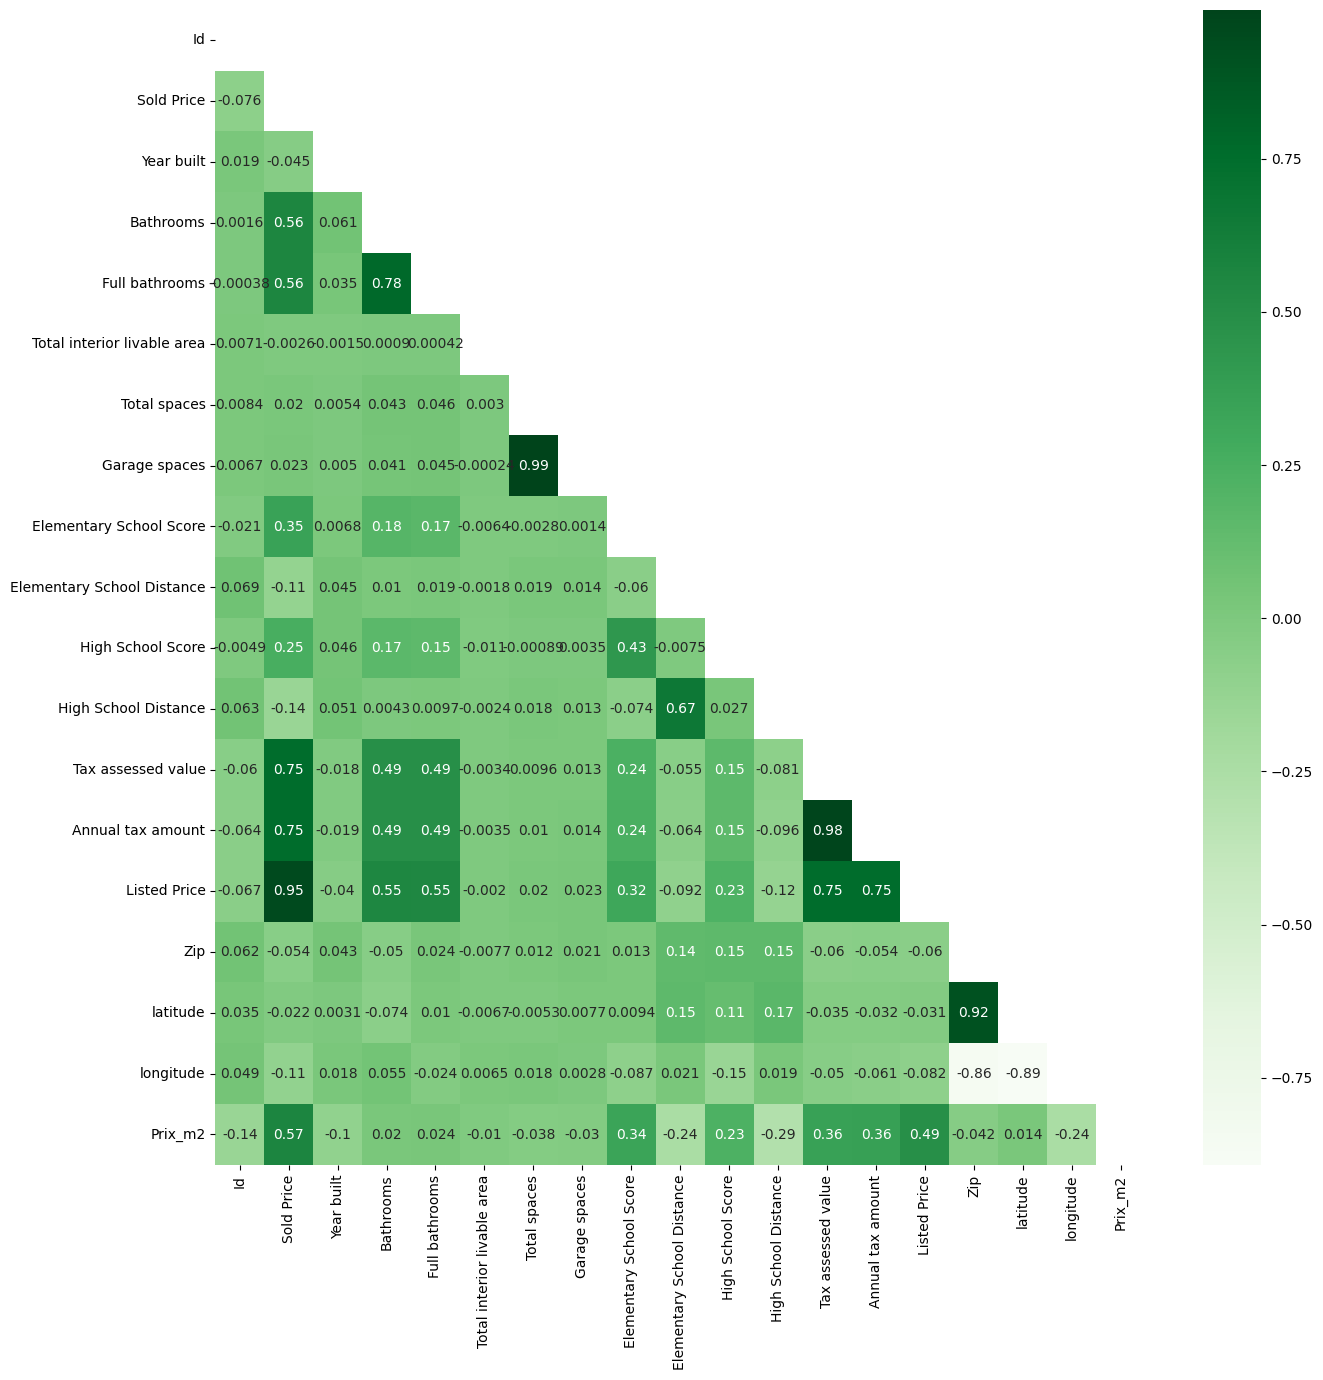

In [22]:

corr = df.corr()
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="Greens",annot=True,mask=mask)

plt.show()


In [15]:
df=df.drop(columns=['Total spaces','Zip','Listed Price','Annual tax amount'])

In [16]:
df = df.drop(columns='Bedrooms')

In [64]:
df

,Id,Sold Price,Type,Year built,Bathrooms,Full bathrooms,Total interior livable area,Garage spaces,Elementary School Score,Elementary School Distance,High School Score,High School Distance,Tax assessed value,Listed On,City,latitude,longitude,Prix_m2
0,1,505000.0,SingleFamily,1926,2.0,2,872.0,1.0,3.000000,0.800000,2.00000,1.3,5.050000e+05,2019-10-16,Los Angeles,33.978652,-118.307728,6230
1,2,140000.0,SingleFamily,1958,3.0,1,1152.0,0.0,5.755392,1.102767,6.17454,10.1,4.962700e+04,2019-08-25,Strawberry,38.193564,-120.014449,1301
2,3,1775000.0,SingleFamily,1947,3.0,3,2612.0,0.0,9.000000,0.200000,8.00000,0.2,1.775000e+06,2019-10-24,Culver City,34.010206,-118.400952,7306
3,5,221000.0,SingleFamily,1905,2.0,2,1311.0,0.0,5.755392,1.102767,2.00000,3.3,2.080800e+05,2019-10-30,Stockton,37.956365,-121.279334,1807
4,7,480000.0,SingleFamily,2005,2.0,2,2519.0,4.0,4.000000,6.300000,2.00000,6.3,7.894083e+05,2019-10-18,Taylorsville,40.100181,-120.852452,2044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44477,47434,159000.0,SingleFamily,1965,2.0,2,1432.0,2.0,3.000000,2.400000,3.00000,1.8,1.250490e+05,2020-09-04,Blythe,33.612985,-114.634252,1194
44478,47435,255000.0,MobileManufactured,1999,2.0,2,1560.0,0.0,5.000000,2.400000,7.00000,2.5,6.892400e+04,2020-07-23,Sunnyvale,37.405326,-122.006049,1753
44479,47436,2300000.0,SingleFamily,1919,2.0,2,1860.0,0.0,7.000000,0.600000,7.00000,0.8,5.780000e+05,2020-12-01,Los Angeles,34.095593,-118.360098,13299
44480,47437,500000.0,SingleFamily,2017,3.0,2,2125.0,4.0,7.000000,0.500000,8.00000,1.2,4.846960e+05,2020-08-01,Elk Grove,38.394786,-121.447627,2528


In [25]:
X = ['Sold Price', 'Bathrooms',
       'Total interior livable area', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'High School Score', 'High School Distance', 'Tax assessed value','latitude', 'longitude']

In [17]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

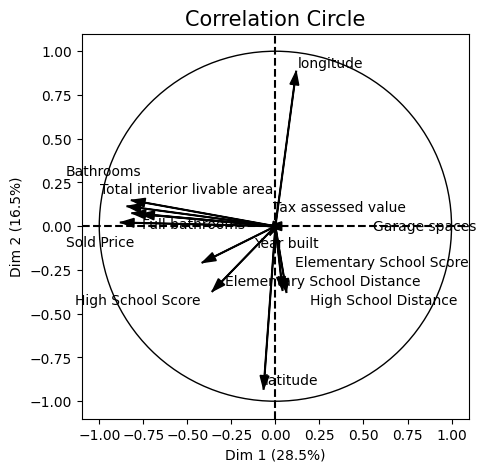

In [91]:
X=df[['Sold Price', 'Year built', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'High School Score', 'High School Distance', 'Tax assessed value','longitude','latitude']].iloc[1:15000,:]

X_norm = X / X.std(axis=0) # 

feature_names = ['Sold Price', 
                 'Year built', 
                 'Bathrooms', 
                 'Full bathrooms',
                 'Total interior livable area',
                 'Garage spaces',
                  'Elementary School Score',
                 'Elementary School Distance',
                 'High School Score', 
                 'High School Distance',
                 'Tax assessed value',
                 'longitude',
                 'latitude'
]

figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=5)


## Apprentissage

In [30]:
from pykrige.rk import RegressionKriging
from sklearn.ensemble import RandomForestRegressor


In [81]:
data =df[['Sold Price', 'Year built', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'High School Score', 'High School Distance', 'Tax assessed value']].iloc[:1000,:].values


In [82]:
data = data /data.std(axis=0)
print(data)

[[ 0.49049322 15.07895282  1.69270023 ...  1.02685318  0.47925857
   0.62414108]
 [ 0.13597832 15.32948578  2.53905035 ...  3.17017311  3.72347046
   0.06133515]
 [ 1.72401081 15.24336507  2.53905035 ...  4.10741274  0.07373209
   2.1937632 ]
 ...
 [ 0.3875382  15.50172719  0.84635012 ...  2.56713296  0.22119627
   0.4886246 ]
 [ 0.19425474 15.26685254  1.69270023 ...  3.17017311  0.8658612
   0.52449109]
 [ 1.84833384 15.11809859  1.69270023 ...  3.08055955  0.84791902
   1.52591618]]


In [83]:
#data = data.values
target = df['Prix_m2'].iloc[:1000].values
target = target / target.std(axis=0)

In [84]:
coord = df[['latitude','longitude']].iloc[:1000]
coord = coord.values

In [85]:
X_train, X_test, target_train, target_test, coord_train, coord_test = train_test_split(data, target, coord, test_size=0.3, random_state=40)

In [86]:
rf = RandomForestRegressor(n_estimators=100)

model = RegressionKriging(regression_model=rf, n_closest_points=10)


In [87]:
model.fit(X_train, coord_train,target_train )

Finished learning regression model
Finished kriging residuals


In [88]:
score_regr_classique = model.regression_model.score(X_test, target_test)
score_with_krig = model.score(X_test, coord_test, target_test)

In [89]:
score_regr_classique

0.9720427411907268

In [90]:
score_with_krig

0.9728906949173842